<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Assignment_1_MLE2_Korman_JamesG_ICPSR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Notes**



*   For this assignment, you will utilize the Garrett data available on the Canvas site. The Garrett data are employed in his book, Partisan Politics in the Global Economy (Cambridge University Press, 1998). With the exception of country, the variables are largely self-explanatory. The country variable includes identifiers for 14 OECD countries. The country codes are: 2 = US, 20 = Canada, 200 = UK, 210 = Netherlands, 211 = Belgium, 220 = France, 260 = Germany, 305 = Austria, 325 = Italy, 375 = Finland, 380 = Sweden, 385 = Norway, 390 = Denmark, 740 = Japan. The data cover the years from 1966-1990. N = 14, T = 25, NT = 350.

*   For this assignment, we will examine whether power of labor parties (leftlab) influence economic growth, controlling for other economic factors. For this assignment, treat the data as repeated observations (time) nested within countries.

* Instructions: Proceed serially through the questions below. Type your answers to the following questions and include any relevant output (code and results), either in the text or attached at the end. If you include the output in the text, you will find that the output is easier to organize if you use a monospaced typeface, like it appears in your Stata and/or R consoles. That is why you will find instructions throughout the assignment encouraging you to use 10pt courier font. If you attach the output to the end, reference the relevant output. Be sure to discuss results at each stage, including any relevant statistics.

Questions:

1. 1. In a few sentences, theorize the relationship between labor party power and economic growth.

2. Estimate a random intercepts model with economic development (gdp) as the dependent variable, leftlab as the independent variable, and include three economic-based variables. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results

3. Using the model estimated in question #1, add a random effect to one of the independent variables of your choosing. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results.


4. Conduct a likelihood ratio test to determine whether the model warrants a random slope effect. For Stata users, you will use the lrtest command (make sure to store the estimates for the random intercept and random slope models). For R users, you will use the anova() function (make sure to specify the object name for the “restricted model” (random intercept) first, followed by the object name for the “unrestricted model” (random slope) second).

5. Explain the importance for estimating a multilevel model for nested data. What are the issues one may encounter if utilizing a pooled model?





# **Useful Links**

https://www.pythonfordatascience.org/mixed-effects-regression-python/

http://mfviz.com/hierarchical-models/

https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html

In [1]:
!pip install researchpy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Question 1** 

* **Question**: In a few sentences, theorize the relationship between labor party power and economic growth.

* **Answer**: left labor party power should have a negative effect on economic growth in the general sense as labor parties and parties of the left are much more union-oriented and choose to promote higher taxes and welfare. Such policies are not conducive for pure economic growth -- as growth is fostered via competitiveness -- and a given economy is competitive (especially internationall) if it has low taxes and favorable business regulations -- both components that parties of the left shun against relative to parties of the right that are historically more business oriented. 

# **Question 2 Random Intercepts Model**

* **Question**: Estimate a random intercepts model with economic development (gdp) as the dependent variable, leftlab as the independent variable, and include three economic-based variables. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results

In [2]:
dtafile = "/content/drive/MyDrive/Delaware/ICPSR_2022/MLE 2/Assignments/Assignment 1/GarrettData.dta"
df = pd.read_stata(dtafile)
df

,country,year,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,...,Icc_13,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand
0,2.0,1966-01-01,3.800000,2.9,5.111141,4.500000,1.99005,5.934182,9.622906,0.0,...,0,0,1.0,0.0,0.0,0.0,1.798529,1.376415,2.475521,51.963692
1,2.0,1967-01-01,3.800000,2.8,2.277283,3.800000,2.90000,5.111141,9.983546,0.0,...,0,0,1.0,0.0,0.0,0.0,1.807786,1.176678,2.127182,36.939121
2,2.0,1968-01-01,3.600000,4.2,4.700000,3.800000,2.80000,2.277283,10.089120,0.0,...,0,0,1.0,0.0,0.0,0.0,1.818176,1.176678,2.139408,57.507980
3,2.0,1969-01-01,3.500000,5.4,2.800000,3.600000,4.20000,4.700000,10.435930,0.0,...,0,0,1.0,0.0,0.0,0.0,1.828545,0.433172,0.792074,55.310432
4,2.0,1970-01-01,4.900000,5.9,-0.200000,3.500000,5.40000,2.800000,10.495350,0.0,...,0,0,1.0,0.0,0.0,0.0,1.833971,0.433172,0.794424,35.684189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,740.0,1986-01-01,2.800000,0.4,2.500000,2.600000,2.00000,4.700000,29.161591,0.0,...,0,1,0.0,0.0,0.0,1.0,1.942272,0.729007,1.415931,87.484772
346,740.0,1987-01-01,2.900000,-0.2,4.400000,2.800000,0.40000,2.500000,21.909870,0.0,...,0,1,0.0,0.0,0.0,1.0,1.937110,0.729007,1.412168,74.493561
347,740.0,1988-01-01,2.500000,0.5,5.700000,2.900000,-0.20000,4.400000,21.712351,0.0,...,0,1,0.0,0.0,0.0,1.0,1.986012,0.729007,1.447818,97.705582
348,740.0,1989-01-01,2.264753,2.3,4.700000,2.500000,0.50000,5.700000,23.128798,0.0,...,0,1,0.0,0.0,0.0,1.0,1.979984,0.729007,1.443423,76.325027


In [3]:
df.describe()

,country,unem,infl,gdp,uneml,infll,gdpl,trade,capmob,oild,...,Icc_13,Icc_14,per6673,per7479,per8084,per8690,corp,leftlab,clint,demand
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,287.357147,4.993873,6.687714,3.254223,4.831613,6.682971,3.336108,57.076248,0.891429,0.015280,...,0.071429,0.071429,0.320000,0.240000,0.200000,0.200000,3.015532,2.027701,6.763461,187.422256
std,173.574265,3.240486,4.079510,2.432580,3.252729,4.062208,2.427306,26.914648,0.895507,0.027165,...,0.257908,0.257908,0.467144,0.427695,0.400573,0.400573,1.033199,0.985260,4.571550,129.179260
min,2.000000,0.684780,-0.700000,-4.300000,0.600000,-0.700000,-4.300000,9.622906,0.000000,-0.117810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414955,0.050658,0.084999,-39.171421
25%,210.000000,2.099248,3.700000,1.877098,2.000000,3.800000,2.000000,41.419391,0.000000,0.003662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.189081,1.143009,2.542276,92.589357
50%,282.500000,4.500000,5.900000,3.200000,3.900000,5.900000,3.300000,52.624180,1.000000,0.013674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.230290,2.174839,6.396097,177.518349
75%,380.000000,7.300000,9.075000,4.700000,7.100000,8.900000,4.794516,71.847086,1.000000,0.030052,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.794158,2.809576,10.014869,257.054947
max,740.000000,13.000000,24.500000,12.800000,13.000000,24.500000,12.800000,146.020203,4.000000,0.083460,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.819816,3.570835,17.161753,644.791138


In [4]:
df.groupby(["country", "year"]).describe()['leftlab']

count      mean  std       min       25%       50%  \
country year                                                             
2.0     1966-01-01    1.0  1.376415  NaN  1.376415  1.376415  1.376415   
        1967-01-01    1.0  1.176678  NaN  1.176678  1.176678  1.176678   
        1968-01-01    1.0  1.176678  NaN  1.176678  1.176678  1.176678   
        1969-01-01    1.0  0.433172  NaN  0.433172  0.433172  0.433172   
        1970-01-01    1.0  0.433172  NaN  0.433172  0.433172  0.433172   
...                   ...       ...  ...       ...       ...       ...   
740.0   1986-01-01    1.0  0.729007  NaN  0.729007  0.729007  0.729007   
        1987-01-01    1.0  0.729007  NaN  0.729007  0.729007  0.729007   
        1988-01-01    1.0  0.729007  NaN  0.729007  0.729007  0.729007   
        1989-01-01    1.0  0.729007  NaN  0.729007  0.729007  0.729007   
        1990-01-01    1.0  0.864677  NaN  0.864677  0.864677  0.864677   

                         75%       max  
country year                            
2.0     1966-01-01  1.376415  1.376415  
        1967-01-01  1.176678  1.176678  
        1968-01-01  1.176678  1.176678  
        1969-01-01  0.433172  0.433172  
        1970-01-01  0.433172  0.433172  
...                      ...       ...  
740.0   1986-01-01  0.729007  0.729007  
        1987-01-01  0.729007  0.729007  
        1988-01-01  0.729007  0.729007  
        1989-01-01  0.729007  0.729007  
        1990-01-01  0.864677  0.864677  

[350 rows x 8 columns]

**Estimating the Random Intercepts Model**

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.mixedlm("gdp ~ leftlab + infl + unem + trade",
                    df,
                    groups= "country").fit()

print(model.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              3.9784   
Min. group size:  25      Likelihood:         -757.6406
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.268    0.583 12.463 0.000  6.125  8.411
leftlab      -0.105    0.171 -0.613 0.540 -0.441  0.231
infl         -0.210    0.029 -7.245 0.000 -0.267 -0.153
unem         -0.295    0.048 -6.185 0.000 -0.388 -0.201
trade        -0.016    0.009 -1.894 0.058 -0.033  0.001
country Var   0.690    0.181                           



In [7]:
# square root of the country Var (random effect (random intercept only in this case))
f"On average, country level groupings/effects vary {np.sqrt(0.690)} units in their effect on gdp (economic growth)"

'On average, country level groupings/effects vary 0.8306623862918074 units in their effect on gdp (economic growth)'

In [8]:
new_line = '\n'
# calculating ICC --> taking variance of the random effect divided by unexplained variance of the model (found in scale in model output)
f"The ICC = {0.690 / 3.9784} which suggests to us that roughly 17 % of the variation in gdp (economic growth) is explained by country-group (level) differences (ie 17% of the variation in gdp is explained purely by what country one lives in"

'The ICC = 0.17343655741001407 which suggests to us that roughly 17 % of the variation in gdp (economic growth) is explained by country-group (level) differences (ie 17% of the variation in gdp is explained purely by what country one lives in'

## **Interpretation**:
* Overall, our fixed effects show that for our main IV of interest "leftlab" that it is not statistically significant even though its sign is correct being negative in the sense that labor parties have a negative effect on economic growth which is what we would traditionally theorize. The coefficient for inflation however, highly statistically significant and negative meaning for every one unit increase in inflation, gdp (economic growth can be expected to decrease by -.210 units. Our variable representing unemployment was also highly statistically significant at the p < .01 level and negative with a coefficient value of -.295 suggesting to us that greater unemployment leads to a loss in economic development or (gdp). Our IV trade also tells a similar story as to uemployment and inflation except that this variable is statistically signifiacnt at the p < .05 level. 

Our random effects (random intercept) in this case has a standard deviation of .83 units suggesting that purely by country-level groups, that differences between countries on gdp can cause variation of 1 standard deviation plus or minues .83 units suggesting to us that country level differences do matter for gdp and aid in explaining the variation in gdp. 

# **Question 3 Random Slopes Model**

Using the model estimated in question #2, add a random effect to one of the independent variables of your choosing. Report the random effects component of the results in standard deviations. Interpret both the fixed and random effects results.

In [9]:
model = smf.mixedlm("gdp ~ leftlab + infl + unem + trade",
                    df,
                    groups= "country").fit()

print(model.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              3.9784   
Min. group size:  25      Likelihood:         -757.6406
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.268    0.583 12.463 0.000  6.125  8.411
leftlab      -0.105    0.171 -0.613 0.540 -0.441  0.231
infl         -0.210    0.029 -7.245 0.000 -0.267 -0.153
unem         -0.295    0.048 -6.185 0.000 -0.388 -0.201
trade        -0.016    0.009 -1.894 0.058 -0.033  0.001
country Var   0.690    0.181                           



In [10]:
# Random Slope Model: Random intercepts and slopes are independent

model2 = smf.mixedlm("gdp ~ leftlab + infl + unem + trade", df, groups= "country",
                     re_formula = "0 + leftlab").fit()

print(model2.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: gdp      
No. Observations: 350     Method:             REML     
No. Groups:       14      Scale:              4.0509   
Min. group size:  25      Likelihood:         -759.7101
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     7.255    0.437 16.619 0.000  6.400  8.111
leftlab      -0.120    0.195 -0.613 0.540 -0.503  0.263
infl         -0.209    0.029 -7.181 0.000 -0.266 -0.152
unem         -0.322    0.048 -6.760 0.000 -0.416 -0.229
trade        -0.012    0.007 -1.732 0.083 -0.026  0.002
leftlab Var   0.128    0.037                           



In [11]:
# standard deviation of leftlab variacne
np.sqrt(.128)

0.35777087639996635

## **Model Interpretation**

* In this random slopes model above where the random slope coefficient is for the variable "leftlab" labor party and (no random intercepts) our model has converged. In interpreting the values, our independent variables (fixed effects) for inflation, unemployment, and trade, were all negatively signed once again statisticallly significant suggesting to us that unit increases in each of these 3 variables causes gdp (economic development) to decline. For our main variable of interest "leftlab" this variable was not statistically signifiacnt but was negatively signed (the correct direction we should expect for the variables impact on gdp).

In interpreting the leftlab random slope, the variance is .128 which means that the standard deviation = .35 units. This indicates that from cluster to cluster, ie between countries, the "leftlab" (left labor party) variable's slope fluctuates by +- .35 - .70 (1-2 standard deviations)



# **Question 3: Random Intercepts & Slope Model**

In [12]:
# Random Slope Model: Random intercepts and slopes are correlated

model3 = smf.mixedlm("gdp ~ leftlab + infl + unem + trade", df, groups= "country",
                     re_formula = "1 + leftlab").fit()

print(model3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    gdp      
No. Observations:    350        Method:                REML     
No. Groups:          14         Scale:                 3.8733   
Min. group size:     25         Likelihood:            -759.8779
Max. group size:     25         Converged:             No       
Mean group size:     25.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              7.231    0.640 11.292 0.000  5.976  8.486
leftlab                0.006    0.281  0.021 0.983 -0.545  0.557
infl                  -0.213    0.029 -7.235 0.000 -0.270 -0.155
unem                  -0.312    0.055 -5.699 0.000 -0.420 -0.205
trade                 -0.018    0.010 -1.781 0.075 -0.037  0.002
country Var            1.040    0.791  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2063: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2075: ConvergenceWarning: Gradient optimization failed, |grad| = 21.436935
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


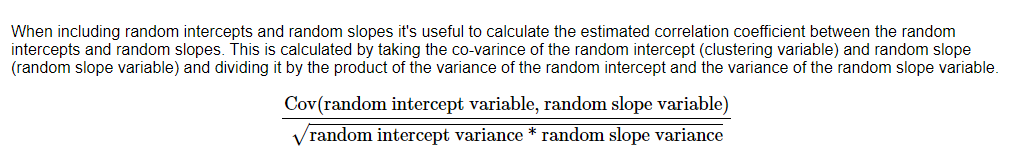

In [13]:
# calculating the correlation coeficient between random intercepts and random slopes
-0.448 / (np.sqrt(1.040 * .528))

-0.6045669239225426

## **Interpretation Random Intercepts Random Slopes Model** 

In interpreting the results of our random intercept random slope model, inflation, unemployment, and trade, once again were all negatively signed and statistically significant suggesting to us that increases in each of these variables causes a decline in gdp. Our key variable of interest "leftlab" remained statistically insignificant once again in terms of the fixed effects. 

With regards to the random effects (the random slope (for leftlab variable) and intercept (country groups) in this case) -- we can interpret them in the following way. The correlation coefficient between the 2 equals -.60 in the formula calcualted above, suggesting to us that countries with more left labor parties tend to have lower gdp. 






# **Assumptions Checking**

## **a. Normality**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

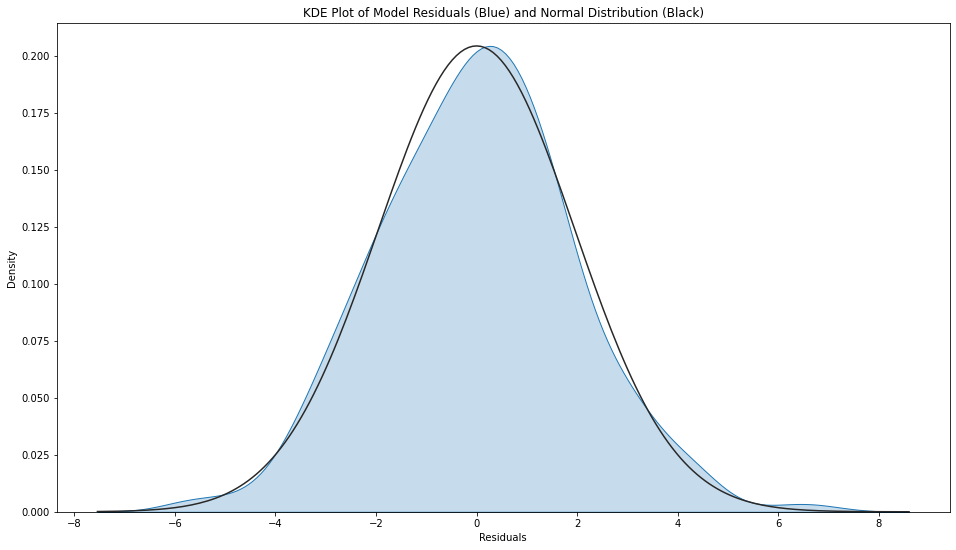

In [14]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

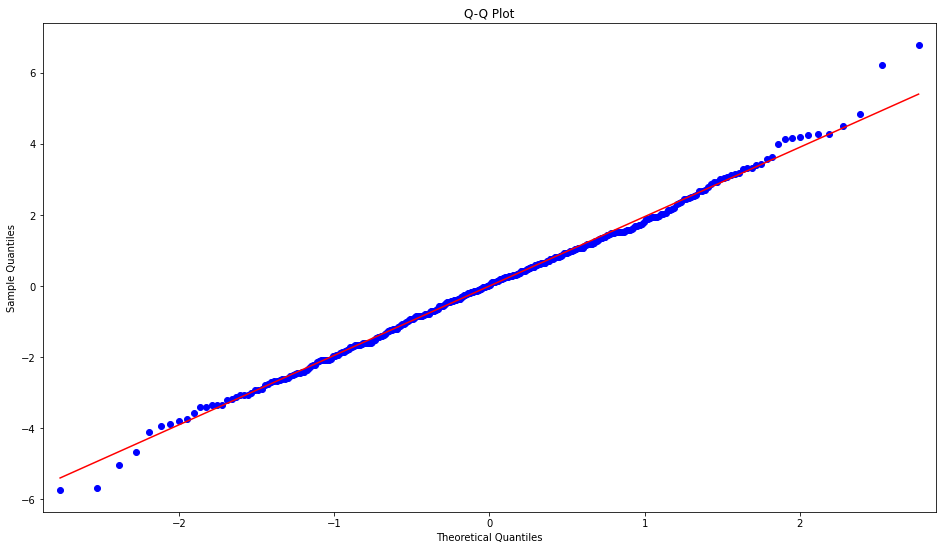

In [15]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

There is some deviation from normality, but it doesn't look concerning. There is an outlier or 2 at the way top, which is evident in both of the plots. How to handle the outlier is up to the researcher.

In [16]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9967729449272156
p-value 0.7129114866256714


The test is significant which indicates that the assumption of normality for the residuals is violated. This would suggest that the model could be adjusted to meet this assumption. Common techniques include transform variables, remove outliers, use a non-parametric approach, or rely on the central limit theorem. 

## **b. HOMOSKEDASTICITY OF VARIANCE**

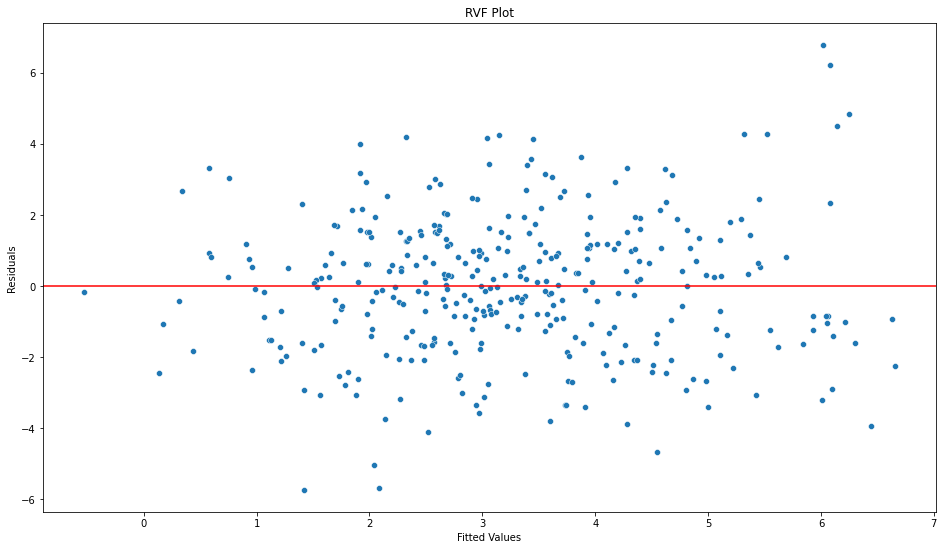

In [17]:
# plotting residuals vs. fitted values
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.axhline(0, color='red')

In [18]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 33.832488328695135
LM-Test p-value 0.0021818792625377618
F-Statistic 2.5605512384875624
F-Test p-value 0.0016508175429805836


(Visually, it appears that we have a rather constant (homoskedastic variance), but our test statistics tell us otherwise & that our model is suffering from heteroskedasticity). Therefore, we can either increase our N, transform variables, or model for the outliers

# **Question 4 Likelihood Ratio Test**

**Conduct a likelihood ratio test to determine whether the model warrants a random slope effect. For Stata users, you will use the lrtest command (make sure to store the estimates for the random intercept and random slope models). For R users, you will use the anova() function (make sure to specify the object name for the “restricted model” (random intercept) first, followed by the object name for the “unrestricted model” (random slope) second).**

For likelihood ratio tests in pyton:

https://stackoverflow.com/questions/30541543/how-can-i-perform-a-likelihood-ratio-test-on-a-linear-mixed-effect-model



In [19]:
print(model.llf)
print(model2.llf)
print(model3.llf)

-757.6405636421308
-759.7101361666531
-759.8778835350362


In [20]:
import scipy as scipy

In [21]:

#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(model.llf - model3.llf)

print(LR_statistic)



#calculate p-value of test statistic using 2 degrees of freedom || degrees of freedom is calculated by the total difference of all variables used between the two models
p_val = scipy.stats.chi2.sf(LR_statistic, 2)

print(p_val)



-4.474639785810723
1.0


**H0: The full model and the nested model fit the data equally well. Thus, you should use the nested model.**

**HA: The full model fits the data significantly better than the nested model. Thus, you should use the full model**

* **If the p-value of the test is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that the full model offers a significantly better fit.**

From the output we can see that the Chi-Squared test-statistic is -4.47 and the corresponding p-value is 1.0.

Since this p-value is not less than .05, we will fail to reject the null hypothesis.

This means the full model and the restricted model (pure random intercept model) fit the data equally well. Thus, we should use the restricted model because the additional predictor variables in the full model don’t offer a significant improvement in fit.

Thus, the final model chosen for estimation out of the three estimated in this analysis is model 1 (our most restricted baseline model that estimates a random-intercept model)

# **Question 5**

**Explain the importance for estimating a multilevel model for nested data. What are the issues one may encounter if utilizing a pooled model?**

**Answer**:

* The importance of estimating a multilevel model for nested data is critical in order to be able to explain all of the levels of variation that go into explaining one's outcome. For instance, by estimating nested data with a multilevel framework, a researcher is able to exploit not only the impacts of group level variation (random effects) but also within unit variation (fixed effects). Depending on the research problem, the researcher can exploit multilevel models further with regard to hypothesizing rates of change for certain variables and how they differ across groups in explaining the variation in a given dependent variable with a random slope, random intercept model. There are so many benefits that one can derive from the multilevel-modeling context as opposed to other pooled estimation techniques that merely seek to estimate "away" and not deal with all of the various observed and unobserved heterogeneities. 

Some issues one may encounter if uitlizing a pooled model is an explicit violation of the asusmption of conditional independence. Our xi's in this case are clearly dependent upon eachother such as a variable such as GDP where GDP one year is a strong determinant of what GDP will look like the next year. One therefore must account for both temporal autocorrelation, but also spatial autocorrelation. For instance, a variable such as trade, if 2 countries are closer toegether spatially, chances are there going to trade more, therefore their erros in the regression model may be correlated as well. One must also be sure that the assumptions of normality hold too. 